# 1. Business Problem Understanding
- Dream Housing Finance Company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the **Customer's Eligibility for Loan.**
- Company wants to automate the **Loan Eligibility Process ( real time )** based on customer detail provided while filling the application form. These details are Gender , Marital Status,Education , Number of Dependents , Income , Loan Amount , Credit History and others. To automate this process , they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [3]:
data = pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 2. Data Understanding
- Loan_ID : Unique Loan ID
 
- Gender : Male/Female

- Married : Applicant married or not

- Dependents : Number of Dependents

- Education : Applicant Education

- Self_Employed : wheather the applicant is Self employed

- ApplicantIncome : Applicant's Income

- CoapplicantsIncome : Coapplicant's Income

- LoanAmount : Loan amount in thosands

- Loan_Amount_Term : Term of loan in months

- Credit_History : credit history meets guidlines or not

- Property_Area : Urban / Semi Urban / Rural

- Loan_Status : Loan approved or not =>**Target variable** 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- **Understand each variable and value clearly .**

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# nunique() = it used to count the number of unique values in a DataFrame.
# It can be used to count the number of unique values in a single column or in multiple columns .

data['Loan_ID'].nunique()

614

---------------
- **Drop unimportant features as per feature selection (Filter Method)**

In [7]:
# here Loan_ID is useless for train ML.

data.drop(columns = ['Loan_ID'],inplace=True)

-------------------

In [8]:
data["Gender"].unique() #Discrete categorical

array(['Male', 'Female', nan], dtype=object)

In [9]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
data["Married"].unique() #Discrete categorical

array(['No', 'Yes', nan], dtype=object)

In [11]:
data["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
data["Dependents"].unique() #Discrete count

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
data["Education"].unique() #Discrete categorical

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
data["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
data["Self_Employed"].unique() #Discrete categorical

array(['No', 'Yes', nan], dtype=object)

In [17]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [18]:
data['ApplicantIncome'].nunique() # continous variable

505

In [19]:
data['CoapplicantIncome'].nunique() # continous variable

287

----------
- **Create new column as per requirments**


In [20]:
data['Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

-------------------

In [21]:
data["LoanAmount"].nunique()  # continous variable

203

In [22]:
data["Loan_Amount_Term"].unique() # discrete count

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [23]:
data["Loan_Amount_Term"].value_counts() 

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
data["Credit_History"].unique() # discrete categorical

array([ 1.,  0., nan])

---------------
- **for better clarity -> replace 0 with bad and 1 with good ( Alphabatical order) for better data understanding**

In [25]:
# here Credit_Hitory means good or bad.

data['Credit_History'] = data['Credit_History'].replace({0:"bad",1:"good"})

-------------

In [26]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [27]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [28]:
data["Property_Area"].unique() #discrete categorical

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [29]:
data["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [30]:
data["Loan_Status"].unique()  #discrete categorical

array(['Y', 'N'], dtype=object)

In [31]:
data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

- **By above procedure we understood each variable and we will categorize them as following.**

In [35]:
continous = ['Income','LoanAmount']

discrete_categorical = ['Gender','Married','Education',
                        'Self_Employed','Credit_History',
                        'Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

## 2.1    Exploratory Data Analysis (EDA)

### For continous variables

In [36]:
data[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


### 2.1.1  Univariate Analysis
- **Analysis by Histogram with KDE plot**- 

    - A histogram is a graphical representation of the distribution of data. It is a type of bar chart that shows the number of data points that fall within a specified range of values. Histograms are often used to visualize continuous data, which is data that can take on any value within a certain range.
    - Histograms are useful for continuous data because they can help to identify patterns and trends in the data. For example, a histogram can show whether the data is normally distributed, skewed to the left or right, or has any outliers. Histograms can also be used to compare two or more sets of data.

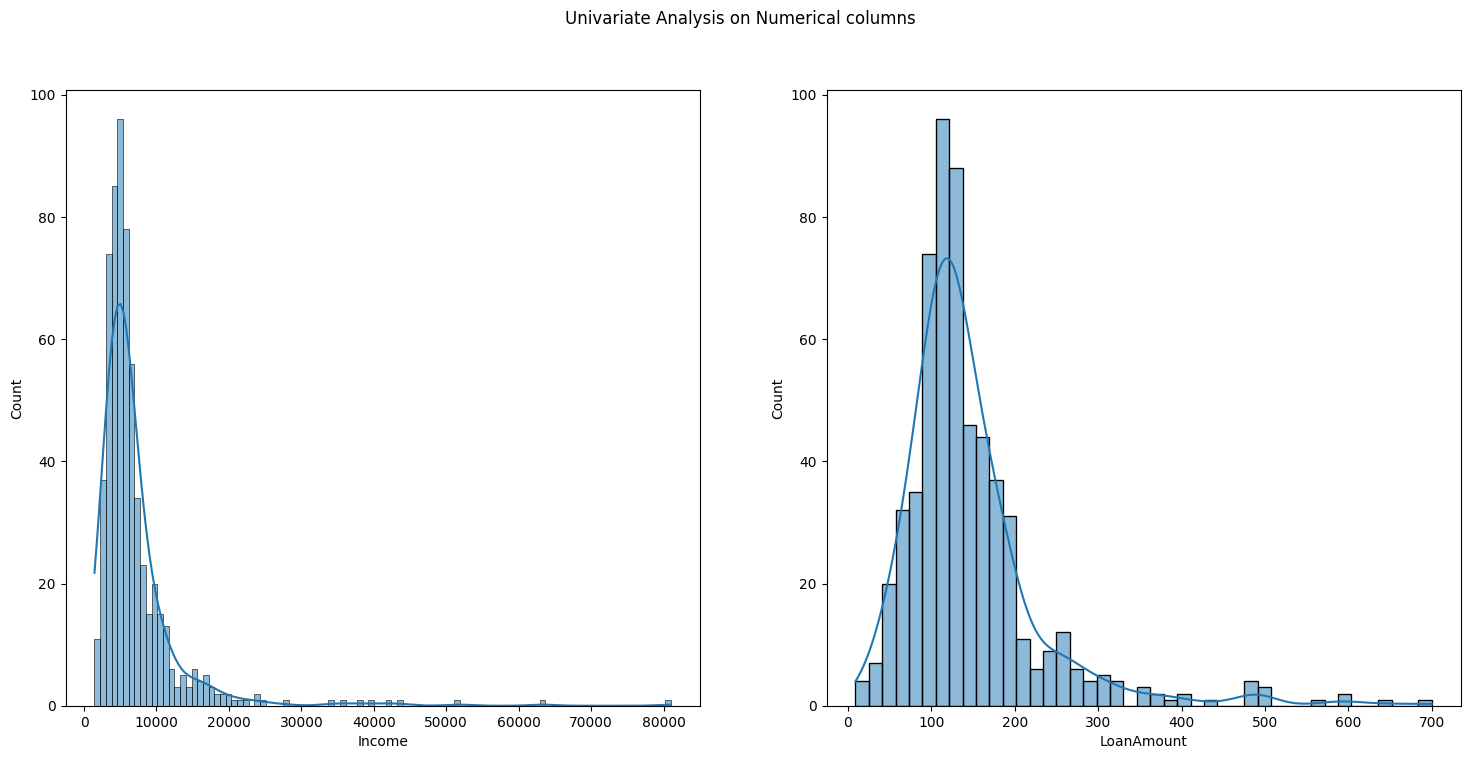

In [38]:
plt.rcParams['figure.figsize'] = (18,8)
# The plt.rcparams['figure.figsize']=(18,8) statement in Python sets the default size of all figures created with Matplotlib to 18 inches wide and 8 inches high. This can be useful if you want to create large figures that are easy to read and understand.

plt.subplot(1,2,1) # subplot with ( row=1 , col=2 , subplot=1 )
sns.histplot(data['Income'],kde=True)

plt.subplot(1,2,2) # subplot with ( row=1 , col=2 , subplot=2 )
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle("Univariate Analysis on Numerical columns")
plt.show()

### 2.1.2 Multivariate Analysis
- **Analysis by pairplot**
     - A pairs plot allows us to see both distribution of single variables and relationships between two variables .

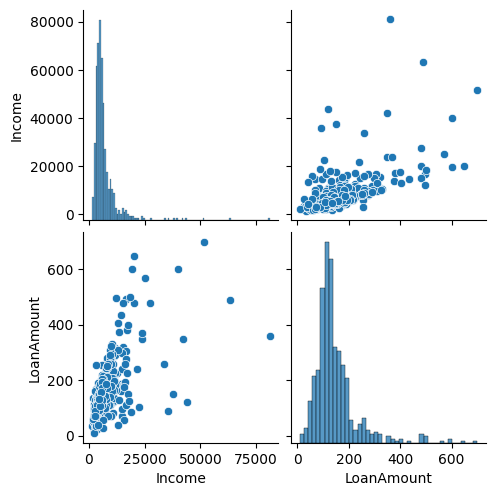

In [40]:
sns.pairplot(data[continous])
plt.show()

- **Check for any colinearity problem**
    - Collinearity refers to a situation where two or more variables are closely related to one another.
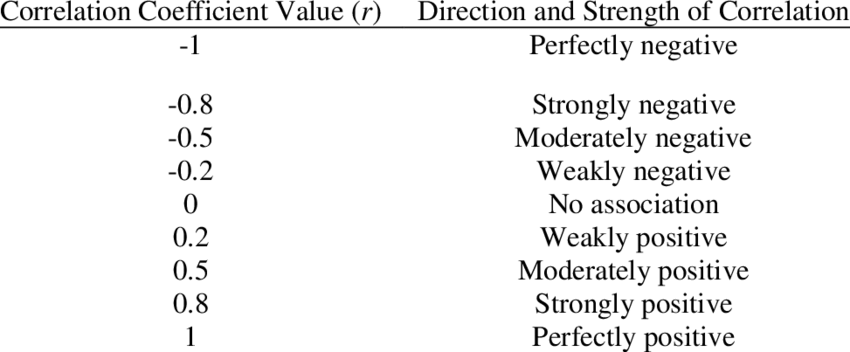

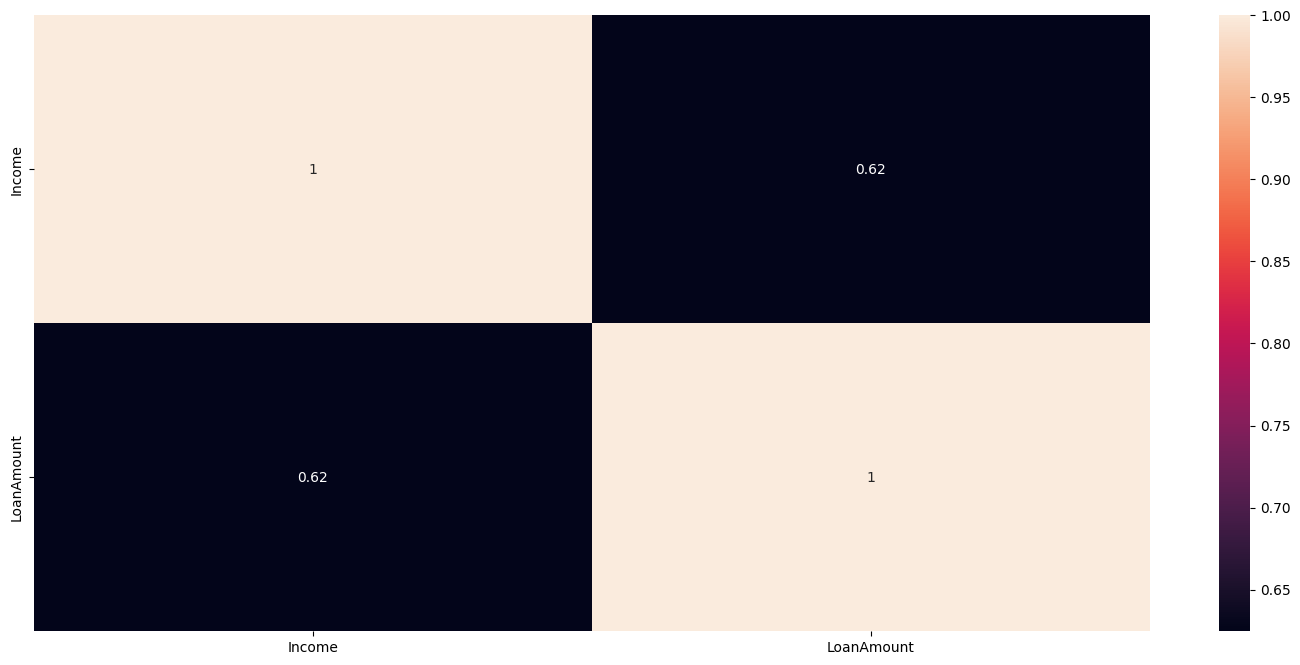

In [41]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

# we can see no colinearity problem is present among continous variables

###  For Discrete variables

In [ ]:
data[discrete_categorical].describe()

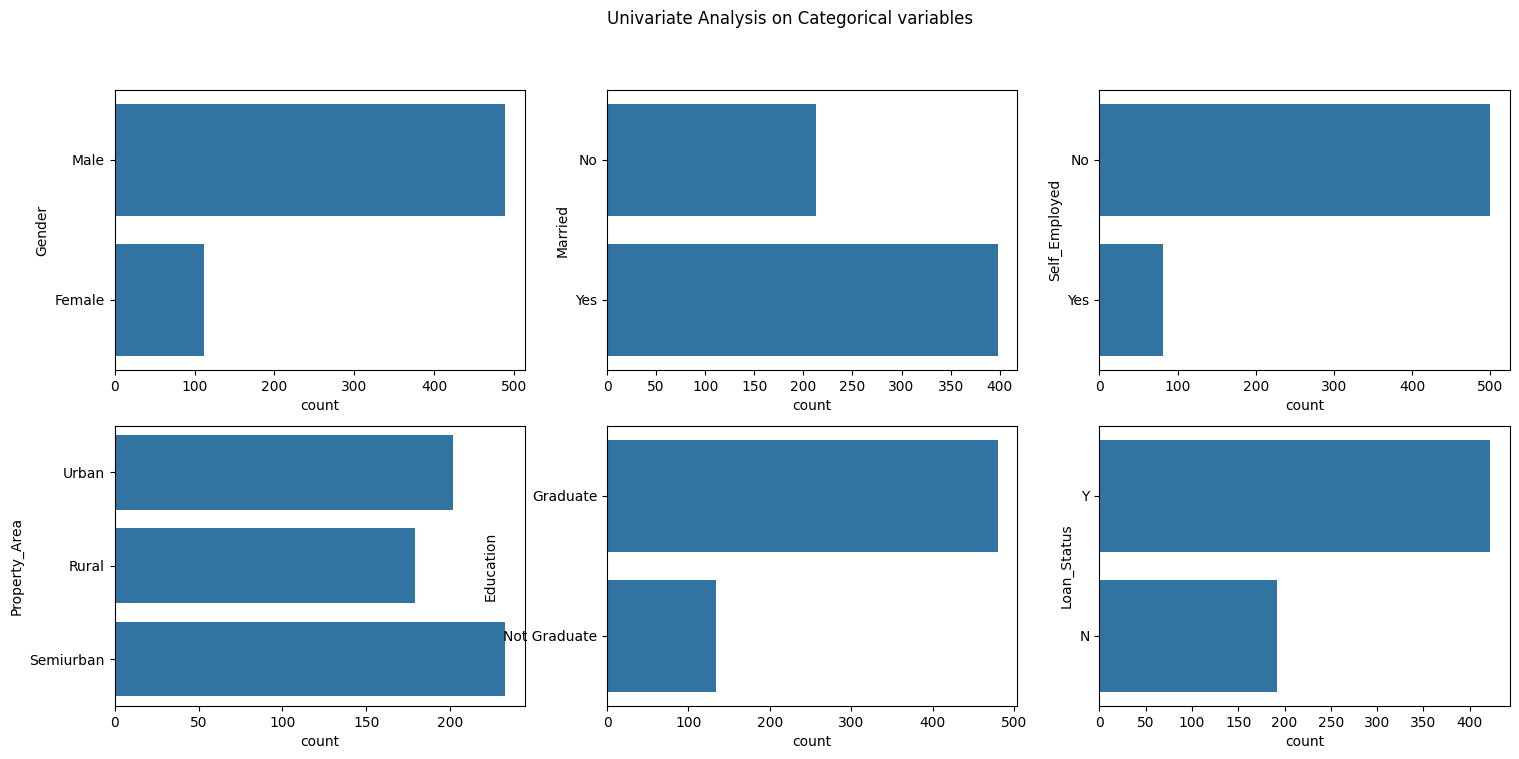

In [42]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical variables')
plt.show()

### 2.1.3 Check for the skewness

In [46]:
data[continous].skew()

# skewness is very high

Income        5.633449
LoanAmount    2.677552
dtype: float64

### 2.1.4 lets check the outliers - 
- **Boxplot**: Box plots show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset. Outliers can reveal mistakes or unusual occurrences in data.

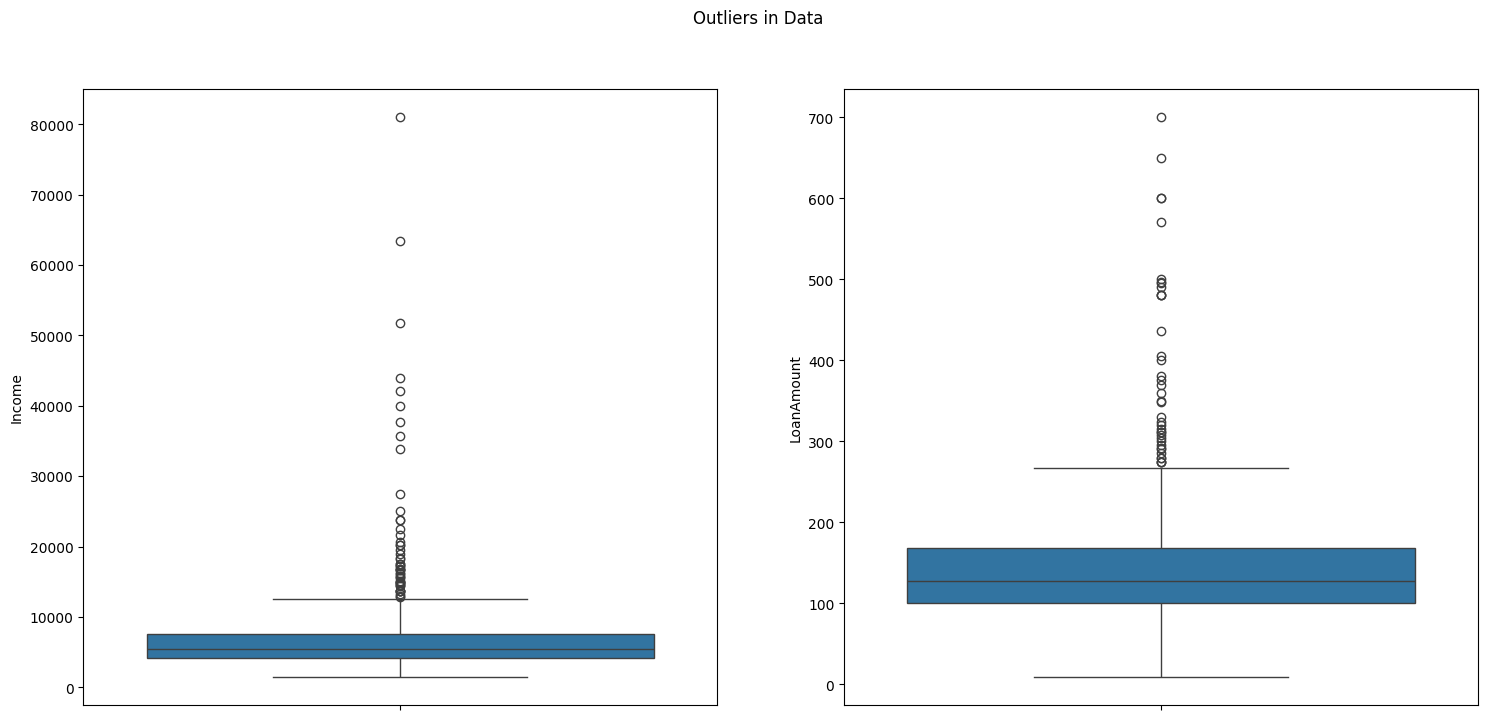

In [44]:
plt.subplot(1,2,1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in Data')
plt.show()

### 2.1.5 Check wheather the variable is  discrete nominal data or not.

-  **all the coulmns are nominal data except "Property_Area"**

### 2.1.5 Check wheather the variable is  discrete Ordinal data or not.

- only **df  ["Property_Area]**
-----------------------

---------------------------------
# 3. Data Preprocessing 
- It includes :
    - **Data Cleaning**
    - **Data Wrangling**

### 3.1  Modifying the Wrong Data

In [51]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

In [52]:
data['Dependents'].unique()

# this column is of object data type which is in wrong format , count variable shouldnot be in object type , it should be of int type only.
# we have to modify the data type after this stage.

array(['0', '1', '2', 3, nan], dtype=object)


- it gives error as missing value is present and (NaN) cant be converted to int type.
-  we have to treate the missing values , then apply (astype=int) function

### 3.2  Missing value Treatement

In [53]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [54]:
# checking the percentage of Missing Values

data.isnull().sum() / len(data) * 100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

----------------
- **Continous variable**
    - here we will drop the missing values becoz we can't replace with mean,mode or any arbitary becoz these are the most important criterias of giving the loans.
    - Credit_History will not be available means loan will not be given .
    - "Income","LoanAmount","Loan_Amount_Term","Credit_History" like this any columns of these types should be filled with orginal values , if there is any missing values.
    ----------------

In [62]:
data = data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])

-----------------
- **Count variable replace with ' 0 '**
----------------

In [63]:
# becoz if there is no dependent we will asume no. of dependence = 0
data['Dependents'] = data['Dependents'].fillna(0)

-------------
- **Discrete Categorical values replace with ' mode '**
------------

In [64]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [65]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

- Now the missing values are cleaned.

### 3.3 Outliers Treatement

-  we will Retrain the outliers becoz in this business problem we shave to consider all the factors . 
-  ex: high amount of salary means higher the loan amount the person can get .
 -  so we will retrain the outliers.

### 3.4 Encoding

In [66]:
data['Gender'] =         data["Gender"].replace({'Male':1,"Female":0})
data['Married'] =        data['Married'].replace({'Yes':1,'No':0})
data['Education'] =      data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] =  data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area'] =  data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1,'bad':0})
data['Loan_Status'] =    data['Loan_Status'].replace({'Y':1,'N':0})

### 3.5 DataType Conversion


In [ ]:
data['Dependents']       = data["Dependents"].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

### 3.6 Transformations


In [67]:
data[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

- we will apply boxcox transformation to convert skewed data to normaly distributed data.
- **The Box-Cox transformation** is a statistical technique that transforms non-normal dependent variables into a normal shape.

In [68]:
from scipy.stats import boxcox
data['Income'],a = boxcox(data['Income'])
data['LoanAmount'],c = boxcox(data['LoanAmount'])

In [70]:
data[['Income','LoanAmount']].skew()

# after applying boxcox transformation , now the data is converted to nomraly distribued

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [71]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12

------------
## Train | Test Split
----------

In [72]:
X= data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)

--------------
# 4 . Machine Learning Modeling & Evaluation
-------------

#### Import everything in oneshot

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

# commonly used for evry algorithm

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### 4.1 Logistic Regression 

In [82]:
# modeling
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#Evaluation
ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))
print("CV Score :",cross_val_score(log_model,X_train,y_train,cv=5).mean())

Train Accuracy :  0.8085106382978723
Test Accuracy :  0.839622641509434
CV Score : 0.803781512605042


### 4.2 KNN 
- Hyperparameter Tuning
- Modeling and Evaluation

In [83]:
# hyperparameter tuning
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,50))}


knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [84]:
knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))
print("CV Score :",cross_val_score(knn_model,X_train,y_train,cv=5).mean())

Train Accuracy :  0.7919621749408984
Test Accuracy :  0.7264150943396226
CV Score : 0.7446218487394958


### 4.3 Support Vector Machine - SVM
- HPT
- Modeling and Evaluation

In [87]:
# hyperparameter tuning
estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}


svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [88]:
# modeling
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

# Evaluation
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))
print("CV Score :",cross_val_score(svm_model,X_train,y_train,cv=5).mean())

Train Accuracy :  0.8085106382978723
Test Accuracy :  0.839622641509434
CV Score : 0.8084873949579832


### 4.4 Decision Tree
- HPT
- Identify important features by using feature selection (ensemble method)
- Modeling and Evaluation

In [91]:
# HyperParameter Tuning
estimator = DecisionTreeClassifier()
param_grid = {"criterion":['gini','entropy'],"max_depth":list(range(1,16))} # max_depth range is known by the default model 

dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt_model = dt_grid.best_estimator_
dt_model


DecisionTreeClassifier(max_depth=1)

In [95]:
# important features
feats_dt = pd.DataFrame (data = dt_model.feature_importances_,
                        index = X.columns,
                        columns = ["Importance in %"])

imp_feats_dt = feats_dt[feats_dt["Importance in %"]>0].index.tolist()
imp_feats_dt

['Credit_History']

- **create Decision Tree Model with Important features and important hyper parameters** :

In [96]:
# selecting train & test data with important features
X_train_dt = X_train[imp_feats_dt]
X_test_dt = X_test[imp_feats_dt]

#modleing
dt_model .fit(X_train_dt,y_train)

# Evaluation
ypred_train = dt_model . predict(X_train_dt)
ypred_test = dt_model . predict(X_test_dt)


print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))
print("CV Score :",cross_val_score(dt_model,X_train,y_train,cv=5).mean())

Train Accuracy :  0.8085106382978723
Test Accuracy :  0.839622641509434
CV Score : 0.8084873949579832


## 4.5 Random Forest
- HPT
- Identify important features by using feature selection (ensemble method)
- Modeling and Evaluation

In [100]:
# hyper parameter tuning
estimator = RandomForestClassifier()
param_grid = {'n_estimators':list(range(1,51))} 

rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

rf_model = rf_grid.best_estimator_
rf_model

RandomForestClassifier(n_estimators=45)

In [101]:
# important features
feats_rf = pd.DataFrame (data = rf_model.feature_importances_,
                        index = X.columns,
                        columns = ["Importance in %"])

imp_feats_rf = feats_rf[feats_rf["Importance in %"]>0].index.tolist()
imp_feats_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [102]:
# selecting train & test data with important features
X_train_rf = X_train[imp_feats_rf]
X_test_rf = X_test[imp_feats_rf]

#modleing
rf_model .fit(X_train_rf,y_train)

# Evaluation
ypred_train = rf_model . predict(X_train_rf)
ypred_test = rf_model . predict(X_test_rf)


print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))
print("CV Score :",cross_val_score(rf_model,X_train,y_train,cv=5).mean())

Train Accuracy :  1.0
Test Accuracy :  0.8301886792452831
CV Score : 0.7753501400560224


## 4.6 Ada_boost

In [104]:
# Hyper parameter tuning
estimator = AdaBoostClassifier()
param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV (estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)

ab_model = ab_grid.best_estimator_

In [105]:
# important features
feats_ab = pd.DataFrame (data = ab_model.feature_importances_,
                        index = X.columns,
                        columns = ["Importance in %"])

imp_feats_ab = feats_ab[feats_ab["Importance in %"]>0].index.tolist()
imp_feats_ab

['Dependents',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [106]:
# selecting train & test data with important features
X_train_ab = X_train[imp_feats_ab]
X_test_ab = X_test[imp_feats_ab]

#modleing
ab_model .fit(X_train_ab,y_train)

# Evaluation
ypred_train = ab_model . predict(X_train_ab)
ypred_test = ab_model . predict(X_test_ab)


print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))
print("CV Score :",cross_val_score(ab_model,X_train,y_train,cv=5).mean())

Train Accuracy :  0.8486997635933806
Test Accuracy :  0.7924528301886793
CV Score : 0.8179551820728292


## 4.7 Gradient_boost


In [107]:
# Hyper parameter tuning
estimator = GradientBoostingClassifier()
param_grid = {'n_estimators':list(range(1,10)),
             "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV (estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

gb_model = gb_grid.best_estimator_

In [109]:
# important features
feats_gb = pd.DataFrame (data = gb_model.feature_importances_,
                        index = X.columns,
                        columns = ["Importance in %"])

imp_feats_gb = feats_gb[feats_gb["Importance in %"]>0].index.tolist()
imp_feats_gb

['Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [112]:
# selecting train & test data with important features
X_train_gb =X_train[imp_feats_gb]
X_test_gb = X_test[imp_feats_gb]

#modleing
gb_model .fit(X_train_gb,y_train)

# Evaluation
ypred_train = gb_model . predict(X_train_gb)
ypred_test = gb_model . predict(X_test_gb)


print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))
print("CV Score :",cross_val_score(gb_model,X_train,y_train,cv=5).mean())

Train Accuracy :  0.8226950354609929
Test Accuracy :  0.839622641509434
CV Score : 0.801344537815126


## 4.8 XG_boost

In [113]:
# this will take so much of time so i dont want t run it now

# Presentation

In [114]:
from joblib import dump
dump (dt_model,'loan.joblib')

['loan.joblib']